## FACE MASK RECONITION

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

Read and plot image

In [3]:
# Let's read Images with mask and without mask
mask_img0 = Image.open('C:/Users/rsvmu/Downloads/Face_Mask/train/with_mask/0-with-mask.jpg')# Copied the path of with mask image
without_mask_img0 = Image.open("C:/Users/rsvmu/Downloads/Face_Mask/train/without_mask/3.jpg")# Copied the path of without mask image

Text(0.5, 1.0, 'Without Mask')

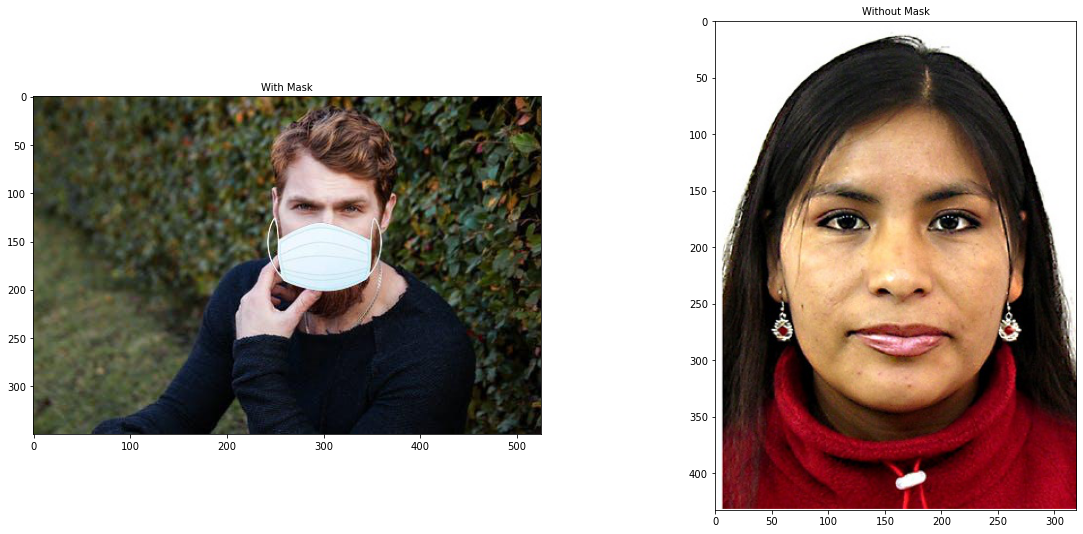

In [4]:
fig = plt.figure(figsize=(20,9))

# Add Subplotting to display multiple images
a1 = fig.add_subplot(1, 2, 1)
img_plot = plt.imshow(mask_img0)
a1.set_title("With Mask", fontsize = 10)


a3 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(without_mask_img0)
a3.set_title("Without Mask", fontsize = 10)

### Image Data Augmentation
    * All RGB Image data will be used to create new samples for Training
    * New samples will transformed using Image Data Generator
    * Images will be resampled using pixel normalization (Divide each pixel by 255), Shear Range, Zoom, Brightness etc.

In [5]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from numpy import expand_dims

In [6]:
img = load_img("C:/Users/rsvmu/Downloads/Face_Mask/train/with_mask/2-with-mask.jpg")

In [7]:
data = img_to_array(img)
# axis = 0, rowwise , axis = 1 (columnwise)
samples = expand_dims(data, axis = 0)

In [8]:
# (1, 428, 320, 3) = Num of images, shape of image = (428,320,3)
samples.shape

(1, 340, 510, 3)

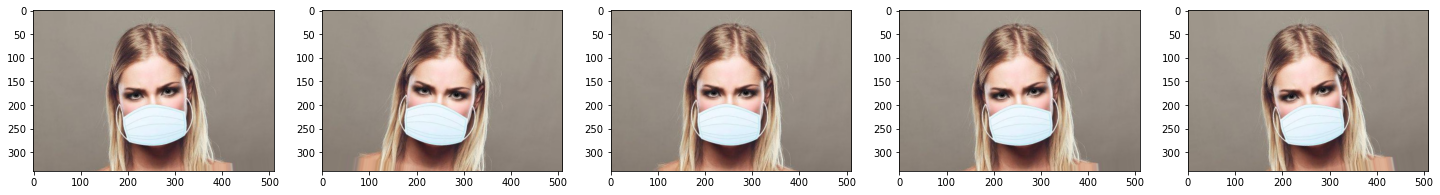

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
# Rotation of Image
## here we are rotating image slightly 5 times
datagen = ImageDataGenerator(rotation_range = 10, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1,5, figsize = (25, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show() 

In [10]:
# Horizontal Flip of Image Data
datagen = ImageDataGenerator(horizontal_flip = True, fill_mode='nearest')


In [11]:
# Zoom Range Transformation of Image Data
datagen = ImageDataGenerator(zoom_range = 0.2, fill_mode='nearest')


In [12]:
# Shear Transformation of Image Data
datagen = ImageDataGenerator(shear_range = 10, fill_mode='nearest')


In [13]:
# Image Transformation , Image Pixel Normalization (0,1)
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=10, zoom_range=0.2, shear_range=10, horizontal_flip=True,
                                  fill_mode='nearest')
# Test Data Generator
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# alternative class_mode = 'categorical'
training_set = train_datagen.flow_from_directory("C:/Users/rsvmu/Downloads/Face_Mask/train", 
                                                 target_size=(150,150), batch_size=16, 
                                                 class_mode='binary')

test_set = train_datagen.flow_from_directory("C:/Users/rsvmu/Downloads/Face_Mask/test", 
                                                 target_size=(150,150), batch_size=16, 
                                                 class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [15]:
training_set.image_shape

(150, 150, 3)

#### CNN Model

In [16]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [17]:
def build_model():
    """Here we are building CNN model with filter size 3 X 3"""
    # FeedForward NN
    model = Sequential()
    # Input Layer
    # filters = Similar to number of Neurons, kernel_size = (3,3), strides = (1,1), padding = 'same'(zero padding), activation = 'relu'
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu',
                    input_shape = (150,150,3)))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv2D - II
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv2D - III
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Flatten Layer
    model.add(Flatten())
    
    # Fully Connected Layer
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    # Optimizers
    optimizers = Adam(learning_rate = 0.0001)
    
    # Model Compiler
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    
    return model

In [18]:
model = build_model()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [20]:
# save best model
from tensorflow.keras import callbacks
filepath = "path/Mask_BestModel.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_model = True, mode = 'min', verbose = 1)
checkpoint

In [21]:
history = model.fit(training_set, validation_data = test_set, epochs=30, callbacks = [checkpoint], verbose = 1)

Epoch 1/30
83/83 [==============================] - ETA: 0s - loss: 0.4486 - accuracy: 0.7839
Epoch 1: saving model to path\Mask_BestModel.hdf5
83/83 [==============================] - 42s 502ms/step - loss: 0.4486 - accuracy: 0.7839 - val_loss: 0.1999 - val_accuracy: 0.9278
Epoch 2/30
83/83 [==============================] - ETA: 0s - loss: 0.1778 - accuracy: 0.9292
Epoch 2: saving model to path\Mask_BestModel.hdf5
83/83 [==============================] - 39s 470ms/step - loss: 0.1778 - accuracy: 0.9292 - val_loss: 0.1765 - val_accuracy: 0.9381
Epoch 3/30
83/83 [==============================] - ETA: 0s - loss: 0.1220 - accuracy: 0.9490
Epoch 3: saving model to path\Mask_BestModel.hdf5
83/83 [==============================] - 36s 433ms/step - loss: 0.1220 - accuracy: 0.9490 - val_loss: 0.1232 - val_accuracy: 0.9588
Epoch 4/30
83/83 [==============================] - ETA: 0s - loss: 0.1076 - accuracy: 0.9604
Epoch 4: saving model to path\Mask_BestModel.hdf5
83/83 [=====================

#### CNN Performance Metrics

In [22]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.448612,0.783866,0.199851,0.927835
1,0.177810,0.929224,0.176540,0.938144
2,0.121998,0.949011,0.123224,0.958763
3,0.107566,0.960426,0.116942,0.958763
4,0.086866,0.964231,0.131899,0.948454
5,0.086883,0.968037,0.111251,0.969072
6,0.072650,0.976408,0.105939,0.969072
7,0.079924,0.974125,0.125894,0.958763
8,0.067011,0.978691,0.113251,0.963918
9,0.068050,0.974886,0.111067,0.969072


<AxesSubplot:>

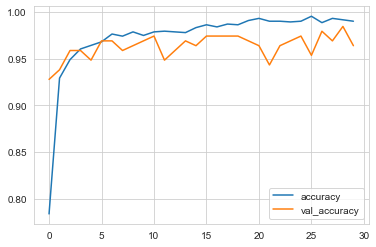

In [23]:
import seaborn as sns
sns.set_style('whitegrid')
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

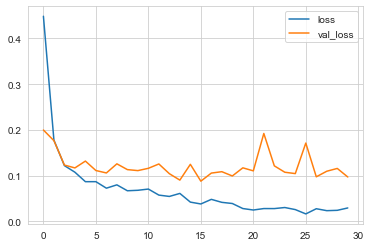

In [24]:
import seaborn as sns
sns.set_style('whitegrid')
pd.DataFrame(history.history)[['loss','val_loss']].plot()

#### Best Model 

In [25]:
model.load_weights('path/Mask_BestModel.hdf5')

In [26]:
predictions = model.predict(test_set)

In [27]:
yhat = np.round(predictions)

In [28]:
model.evaluate(test_set)

13/13 [==============================] - 2s 123ms/step - loss: 0.1073 - accuracy: 0.9742


[0.10727307945489883, 0.9742268323898315]

In [29]:
test_set.class_indices

{'with_mask': 0, 'without_mask': 1}

In [30]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(test_set.classes, yhat)

array([[50, 47],
       [51, 46]], dtype=int64)

In [32]:
from tensorflow.keras.preprocessing import image
#import datetime
# Using pre-saved model into the new model (No need to re-train model)
model.load_weights("path/Mask_BestModel.hdf5")

color_dict={0:(0,255,0), 1:(0,0,255)}

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
while cap.isOpened():
    _,img = cap.read()
    face=face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        # These are transformation of image to satify the model input image
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis = 0)
        # predict
        pred = model.predict(test_image)[0][0]
        print(pred)
        if pred == 1:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'NO MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
    
    cv2.imshow('img', img)
    
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0039346814


KeyError: 0.0039346814